In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


데이터 탐색

In [2]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
gender_sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.describe(include = ["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df_test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [9]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df_train = df_train.drop(['PassengerId','Ticket'] , axis = 1)
df_test = df_test.drop(['Ticket'] , axis = 1)
y = df_train['Survived']
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


In [11]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,NaN,S


각 피처 별로 탐색

In [12]:
df_train[['Pclass','Survived']].groupby('Pclass').mean().sort_values('Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [13]:
df_train[['Sex','Survived']].groupby('Sex').mean().sort_values('Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [14]:
df_train[['SibSp','Survived']].groupby('SibSp').mean().sort_values('SibSp')

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [15]:
df_train[['Parch','Survived']].groupby('Parch').mean().sort_values('Parch')

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [16]:
df_train[['Embarked','Survived']].groupby('Embarked').mean().sort_values('Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


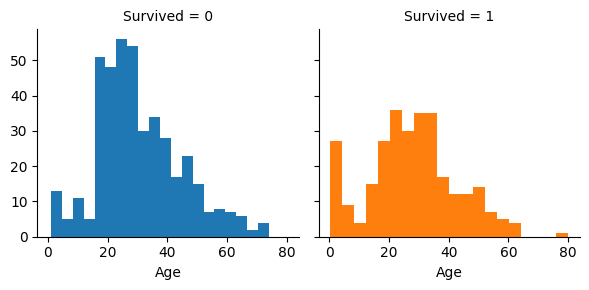

In [17]:
g = sns.FacetGrid(df_train,col='Survived' , hue = 'Survived')
g.map(plt.hist,'Age', bins = 20)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


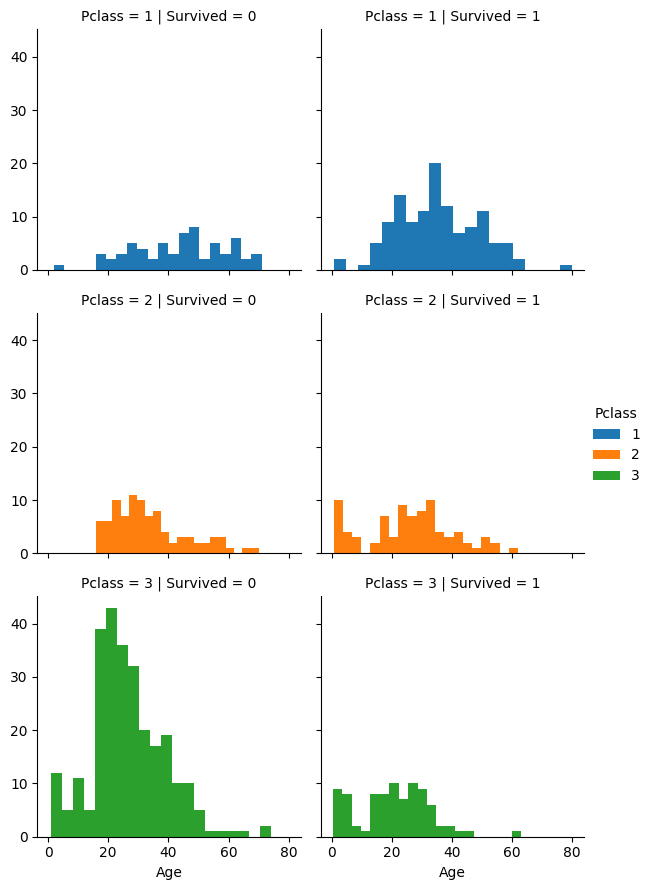

In [18]:
g = sns.FacetGrid(df_train,col='Survived' , row = 'Pclass' , hue = 'Pclass')
g.map(plt.hist,'Age', bins = 20)
g.add_legend()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


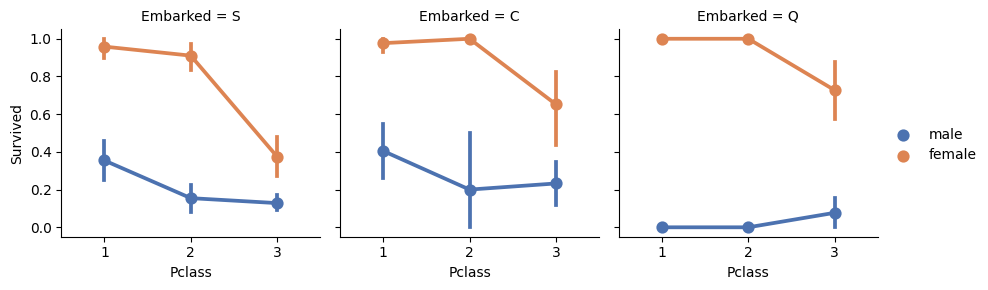

In [19]:
g = sns.FacetGrid(df_train,col='Embarked')
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order = [1, 2, 3], hue_order = ["male", "female"])
g.add_legend()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/

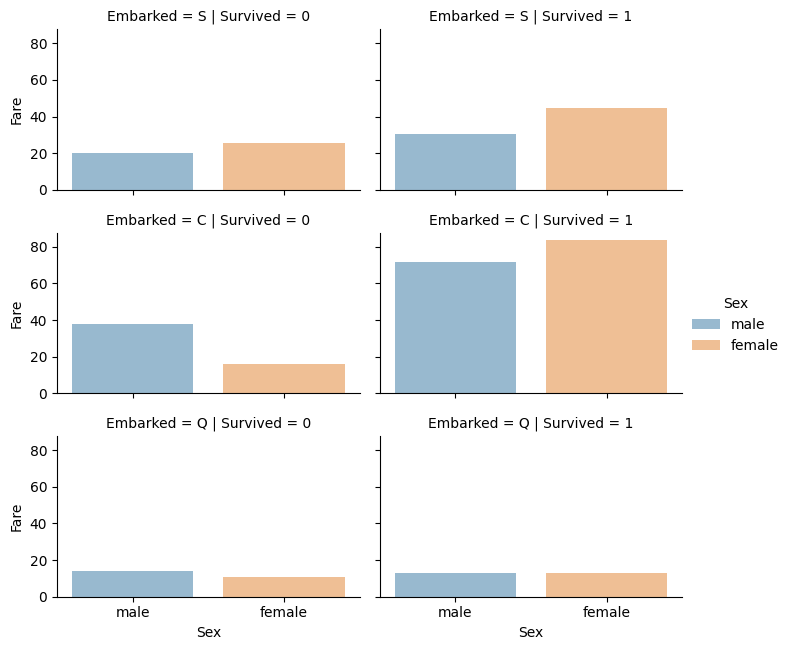

In [20]:
g = sns.FacetGrid(df_train, row='Embarked', col='Survived', height=2.2, aspect=1.6, hue='Sex')

g.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None,order=["male","female"])

g.add_legend()

Age 범위 쪼개기 1보다 작은 나이를 1로 합침 

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


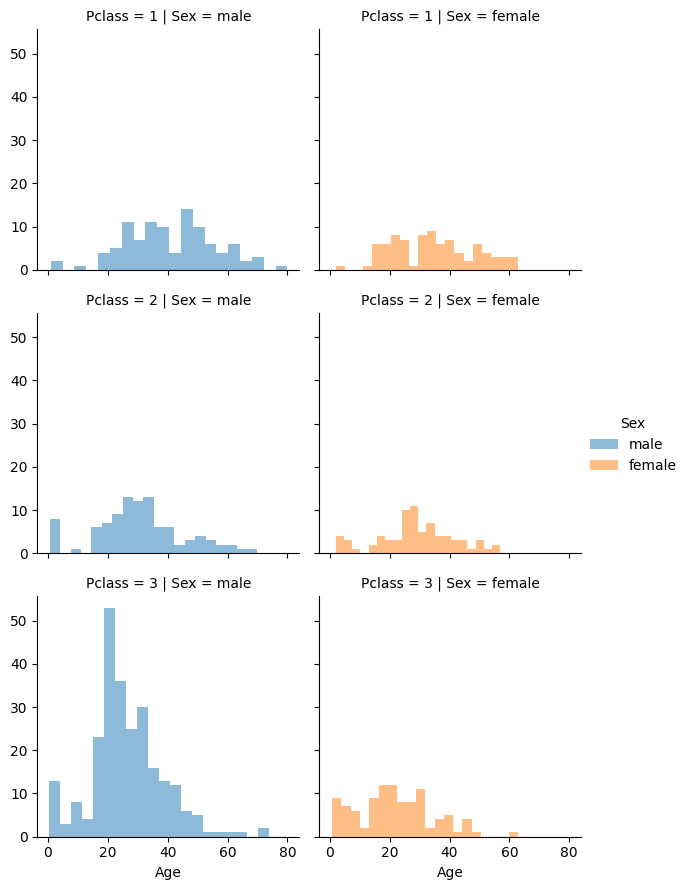

In [21]:
grid = sns.FacetGrid(df_train, row='Pclass', col='Sex', hue='Sex')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [22]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


<Axes: >

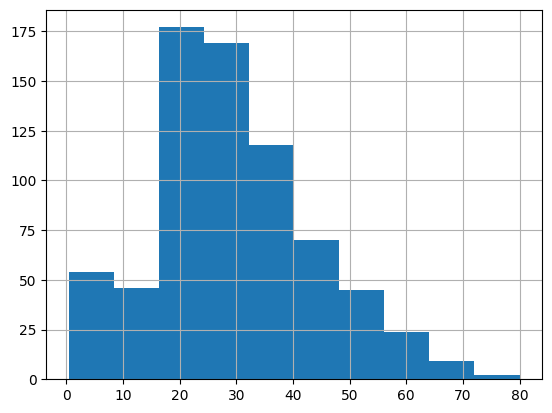

In [23]:
df_train["Age"].hist()

In [24]:
df_train['Age'].value_counts().sort_index()

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: count, Length: 88, dtype: int64

In [25]:
df_train['Age'].isnull().sum()

177

In [26]:
df_train[df_train['Sex'] == 'male']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...
883,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,10.5000,NaN,S
884,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,7.0500,NaN,S
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


In [27]:
combine = [df_train, df_test]

guess_ages = np.zeros((2,3))
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            if(i == 0):
                guess_df = dataset[(dataset['Sex'] == 'male') & 
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
             # 위에서 guess_ages사이즈를 [2,3]으로 잡아뒀으므로 j의 범위도 이를 따름
            
                age_guess = guess_df.median()

             # age의 random값의 소수점을 .5에 가깝도록 변형
                guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5           
            else:
                guess_df = dataset[(dataset['Sex'] == 'female') & 
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
             # 위에서 guess_ages사이즈를 [2,3]으로 잡아뒀으므로 j의 범위도 이를 따름
            
                age_guess = guess_df.median()

             # age의 random값의 소수점을 .5에 가깝도록 변형
                guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5      
   
    for i in range(0, 2):
        for j in range(0, 3):
            if(i == 0):
                dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == 'male') & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]

            else:
                dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == 'female') & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]


    dataset['Age'] = dataset['Age'].astype(int)
    print(guess_ages)

df_train.isnull().sum()

[[40.  30.  25. ]
 [35.  28.  21.5]]
[[42. 28. 24.]
 [41. 24. 22.]]


Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [28]:
# df_train['Age'].mean().round(2)

In [29]:
# age_mean = df_train['Age'].mean().round(2)
# df_train["Age"] = df_train["Age"].fillna(age_mean)
# df_test["Age"] = df_test["Age"].fillna(age_mean)
# df_train["Age"].isnull().sum()

In [30]:
df_train["Age"].head(10)

0    22
1    38
2    26
3    35
4    35
5    25
6    54
7     2
8    27
9    14
Name: Age, dtype: int64

In [31]:
df_test["Age"].isnull().sum()

0

In [32]:
df_train["Age"].unique()

array([22, 38, 26, 35, 25, 54,  2, 27, 14,  4, 58, 20, 39, 55, 30, 31, 21,
       34, 15, 28,  8, 19, 40, 66, 42, 18,  3,  7, 49, 29, 65,  5, 11, 45,
       17, 32, 16,  0, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

In [33]:
df_train["Age"].nunique()

71

In [34]:
df_train[df_train["Age"] ==1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
164,0,3,"Panula, Master. Eino Viljami",male,1,4,1,39.6875,NaN,S
172,1,3,"Johnson, Miss. Eleanor Ileen",female,1,1,1,11.1333,NaN,S
183,1,2,"Becker, Master. Richard F",male,1,2,1,39.0000,F4,S
381,1,3,"Nakid, Miss. Maria (""Mary"")",female,1,0,2,15.7417,NaN,C
386,0,3,"Goodwin, Master. Sidney Leonard",male,1,5,2,46.9000,NaN,S
788,1,3,"Dean, Master. Bertram Vere",male,1,1,2,20.5750,NaN,S
827,1,2,"Mallet, Master. Andre",male,1,0,2,37.0042,NaN,C


In [35]:
df_train['Age'].value_counts().sort_index()

Age
0      7
1      7
2     10
3      6
4     10
      ..
66     1
70     3
71     2
74     1
80     1
Name: count, Length: 71, dtype: int64

In [36]:
df_train['Ages'] = 0

df_train.loc[(df_train['Age'] >= 0) & (df_train['Age'] <= 20),'Ages'] = 0
df_train.loc[(df_train['Age'] > 20) & (df_train['Age'] <= 40),'Ages'] = 1
df_train.loc[(df_train['Age'] > 40) & (df_train['Age'] <= 60),'Ages'] = 2
df_train.loc[(df_train['Age'] > 60),'Ages'] = 3
df_train  =  df_train.drop(['Age'], axis = 1)
df_test['Ages'] = 0

df_test.loc[(df_test['Age'] >= 0) & (df_test['Age'] <= 20),'Ages'] = 0
df_test.loc[(df_test['Age'] > 20) & (df_test['Age'] <= 40),'Ages'] = 1
df_test.loc[(df_test['Age'] > 40) & (df_test['Age'] <= 60),'Ages'] = 2
df_test.loc[(df_test['Age'] > 60),'Ages'] = 3
df_test = df_test.drop(['Age'], axis = 1)

df_train['Ages'].value_counts()

Ages
1    563
0    180
2    126
3     22
Name: count, dtype: int64

In [37]:
df_test['Ages'].value_counts()

Ages
1    264
2     75
0     69
3     10
Name: count, dtype: int64

In [38]:
# df_train['AgeBand'] = pd.cut(df_train['Age'], 4)
# # 임의로 5개 그룹을 지정
# df_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

In [39]:
df_train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Cabin,Embarked,Ages
0,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,NaN,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,NaN,S,1


<Axes: >

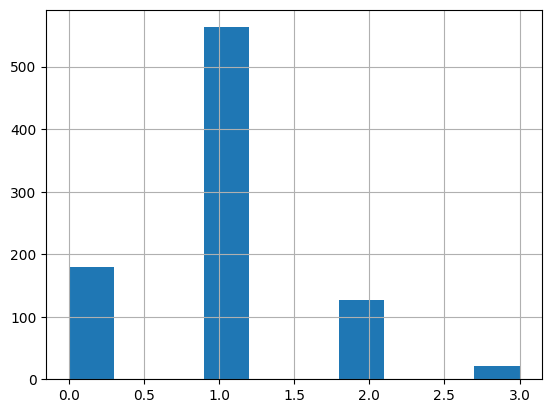

In [40]:
df_train['Ages'].hist()

SibSp , Parch 변수를 이용하여 family 변수 만들기

In [41]:
df_train["family_size"] = df_train['SibSp'] + df_train["Parch"] + 1
df_test["family_size"] = df_test['SibSp'] + df_test["Parch"] + 1
print(df_train["family_size"].value_counts().sort_index())
df_train.groupby('family_size',as_index=False)[['family_size','Survived']].mean().sort_values(by ='Survived' ,ascending = False)

family_size
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64


,family_size,Survived
3,4.0,0.724138
2,3.0,0.578431
1,2.0,0.552795
6,7.0,0.333333
0,1.0,0.303538
4,5.0,0.200000
5,6.0,0.136364
7,8.0,0.000000
8,11.0,0.000000


In [42]:
df_train["Alone"] = 0
df_train.loc[df_train['family_size'] == 1,"Alone"] = 1
df_test["Alone"] = 0
df_test.loc[df_test['family_size'] == 1,"Alone"] = 1
df_train.groupby('Alone')[['Alone','Survived']].mean()

,Alone,Survived
Alone,,
0,0.0,0.505650
1,1.0,0.303538


In [43]:
df_train = df_train.drop(['Parch', 'SibSp', 'family_size'], axis=1)
df_test = df_test.drop(['Parch', 'SibSp', 'family_size'], axis=1)
df_train.head()

,Survived,Pclass,Name,Sex,Fare,Cabin,Embarked,Ages,Alone
0,0,3,"Braund, Mr. Owen Harris",male,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,7.9250,NaN,S,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,8.0500,NaN,S,1,1


In [44]:
combine = [df_train, df_test]
print("After", df_train.shape, df_test.shape)

After (891, 9) (418, 9)


Name 변수 처리하기

In [45]:
df_train['Name'] = df_train['Name'].apply(lambda x : x.split(',')[1].split('.')[0].lstrip())
df_test['Name'] = df_test['Name'].apply(lambda x : x.split(',')[1].split('.')[0].lstrip())
df_train['Name'].value_counts()

Name
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [46]:
df_test['Name'].value_counts()

Name
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [47]:
pd.crosstab(df_train['Name'], df_train['Sex'])

Sex,female,male
Name,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [48]:
name_list = df_train['Name'].unique().tolist()
name_list

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'the Countess',
 'Jonkheer']

In [49]:
name_list = ['Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'the Countess',
 'Jonkheer',
 'Dona']

In [50]:
def give_grade(x):
    if(x in name_list):
        return 'Rare'
#     elif(x == 'Master'):
#         return 'Mr'
#     elif(x == 'Mrs'):
#         return 'Miss'
    else:
        return x

In [51]:
df_train['Name'] = df_train['Name'].apply(lambda x : give_grade(x))
df_test['Name'] = df_test['Name'].apply(lambda x : give_grade(x))
df_train['Name'].value_counts()

Name
Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: count, dtype: int64

In [52]:
df_train[['Name','Survived']].groupby(['Name']).mean()

,Survived
Name,
Master,0.575000
Miss,0.697802
Mr,0.156673
Mrs,0.792000
Rare,0.444444


name 변수를 숫자형 변수로 바꿔줌

In [53]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

df_train['Name'] = df_train["Name"].apply(lambda x : title_mapping[x])
df_test['Name'] = df_test["Name"].apply(lambda x : title_mapping[x])
df_train['Name'].value_counts()

Name
1    517
2    182
3    125
4     40
5     27
Name: count, dtype: int64

In [54]:
df_train.head()

,Survived,Pclass,Name,Sex,Fare,Cabin,Embarked,Ages,Alone
0,0,3,1,male,7.2500,NaN,S,1,0
1,1,1,3,female,71.2833,C85,C,1,0
2,1,3,2,female,7.9250,NaN,S,1,1
3,1,1,3,female,53.1000,C123,S,1,0
4,0,3,1,male,8.0500,NaN,S,1,1


Age변수와 Pclass를 곱한 Age*Class변수 생성

In [55]:
df_train["Age*Pclass"] = df_train["Ages"] * df_train["Pclass"]
df_test["Age*Pclass"] = df_test["Ages"] * df_test["Pclass"]
df_train.loc[:, ['Age*Pclass', 'Ages', 'Pclass']].head()

,Age*Pclass,Ages,Pclass
0,3,1,3
1,1,1,1
2,3,1,3
3,1,1,1
4,3,1,3


Ebmarked 변수 결측지를 최빈값으로 변환

In [56]:
embarked_mode = df_train['Embarked'].mode()[0]
df_train['Embarked'] = df_train['Embarked'].fillna(embarked_mode)
df_test['Embarked'] = df_test['Embarked'].fillna(embarked_mode)
df_train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [57]:
df_train[['Embarked','Survived']].groupby('Embarked',as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [58]:
df_train['Embarked'] = df_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
df_test['Embarked'] = df_test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

df_train['Embarked'].value_counts()

Embarked
0    646
1    168
2     77
Name: count, dtype: int64

Fare 변수를 중앙값으로 바꿈

In [59]:
df_train['Fare'] = df_train['Fare'].map(lambda x : round(x))
df_train['Fare'].fillna(df_test['Fare'].median())
df_test['Fare'] = df_train['Fare'].map(lambda x : round(x))
df_test['Fare'].fillna(df_test['Fare'].median())

df_train['Fare'].value_counts().sort_index()

Fare
0      15
4       1
5       1
6       5
7      65
       ..
228     4
248     2
262     2
263     4
512     3
Name: count, Length: 90, dtype: int64

<Axes: >

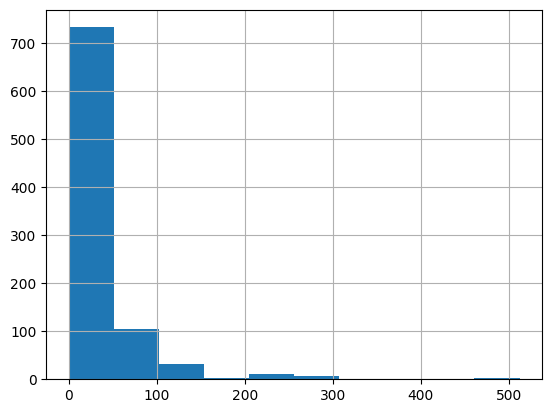

In [60]:
df_train['Fare'].hist()

Fare 변수를 숫자형 변수로 변환

In [61]:
df_train['FareRange'] = pd.qcut(df_train['Fare'],4)
df_train[['FareRange','Survived']].groupby('FareRange', as_index = False).mean()

,FareRange,Survived
0,"(-0.001, 8.0]",0.201365
1,"(8.0, 14.0]",0.335366
2,"(14.0, 31.0]",0.457399
3,"(31.0, 512.0]",0.597156


In [62]:
combine = [df_train, df_test]

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 8, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

df_train = df_train.drop(['FareRange'], axis=1)
    
df_train.head()

,Survived,Pclass,Name,Sex,Fare,Cabin,Embarked,Ages,Alone,Age*Pclass
0,0,3,1,male,0,NaN,0,1,0,3
1,1,1,3,female,3,C85,1,1,0,1
2,1,3,2,female,0,NaN,0,1,1,3
3,1,1,3,female,3,C123,0,1,0,1
4,0,3,1,male,0,NaN,0,1,1,3


Cabin 변수 분석

In [63]:
cabin_list = df_train["Cabin"].value_counts().index.tolist()
first_cabin = {}

for i in cabin_list:
    if i[0] not in first_cabin:
        first_cabin[i[0]] = 0
    first_cabin[i[0]] += 1
first_cabin

{'B': 33, 'G': 1, 'C': 42, 'F': 7, 'E': 23, 'D': 25, 'A': 15, 'T': 1}

In [64]:
df_train["Cabin"] = df_train["Cabin"].fillna('X')
df_test["Cabin"] = df_test["Cabin"].fillna('X')
df_train["Cabin"] = df_train["Cabin"].apply(lambda x : x[0])
df_test["Cabin"] = df_test["Cabin"].apply(lambda x : x[0])
df_train["Cabin"] = df_train["Cabin"].replace({'G':'X','T':'X'})
df_test["Cabin"] = df_test["Cabin"].replace({'G':'X','T':'X'})

df_train["Cabin"].value_counts()

Cabin
X    692
C     59
B     47
D     33
E     32
A     15
F     13
Name: count, dtype: int64

In [65]:
df_train[['Cabin','Survived']].groupby('Cabin',as_index = False).agg(['sum', 'mean'])

Survived          
           sum      mean
Cabin                   
A            7  0.466667
B           35  0.744681
C           35  0.593220
D           25  0.757576
E           24  0.750000
F            8  0.615385
X          208  0.300578

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


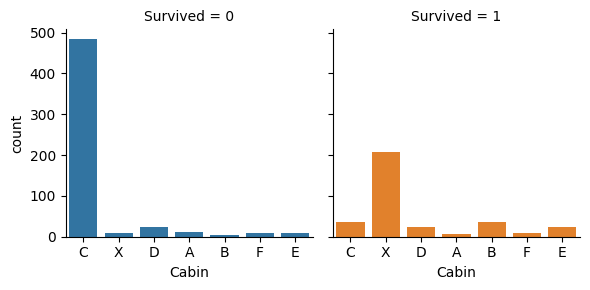

In [66]:
g = sns.FacetGrid(df_train,col='Survived' , hue = 'Survived')
g.map(sns.countplot,'Cabin')

<Axes: xlabel='Cabin', ylabel='count'>

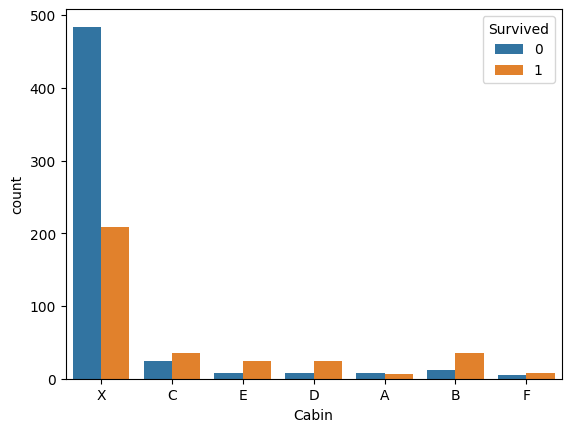

In [67]:
sns.countplot(x='Cabin',hue='Survived',data= df_train)

마지막으로 Sex 와 Cabin을 숫자형 변수형 변수로 바꿔줌

In [68]:
df_train.head()

,Survived,Pclass,Name,Sex,Fare,Cabin,Embarked,Ages,Alone,Age*Pclass
0,0,3,1,male,0,X,0,1,0,3
1,1,1,3,female,3,C,1,1,0,1
2,1,3,2,female,0,X,0,1,1,3
3,1,1,3,female,3,C,0,1,0,1
4,0,3,1,male,0,X,0,1,1,3


In [69]:
df_train['Cabin'].value_counts().index.tolist()

['X', 'C', 'B', 'D', 'E', 'A', 'F']

In [70]:
combine = [df_train, df_test]

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    dataset['Cabin'] = dataset['Cabin'].map({'X' : 1, 'C' : 2, 'B' : 3, 'D' : 4, 'E' : 5, 'A' : 6 , 'F' : 7})

df_train.head()

,Survived,Pclass,Name,Sex,Fare,Cabin,Embarked,Ages,Alone,Age*Pclass
0,0,3,1,0,0,1,0,1,0,3
1,1,1,3,1,3,2,1,1,0,1
2,1,3,2,1,0,1,0,1,1,3
3,1,1,3,1,3,2,0,1,0,1
4,0,3,1,0,0,1,0,1,1,3


In [71]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Fare,Cabin,Embarked,Ages,Alone,Age*Pclass
0,892,3,1,0,0,1,2,1,1,3
1,893,3,3,1,3,1,0,2,0,6
2,894,2,1,0,0,1,2,3,1,6
3,895,3,1,0,3,1,0,1,1,3
4,896,3,3,1,0,1,0,1,0,3


데이터 준비

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [73]:
# 목적 변수 제거
x_train = df_train.drop("Survived", axis=1)
#목적 변수 역할
y_train = df_train["Survived"]
#예측 대상 데이터 셋
x_test  = df_test.drop("PassengerId", axis=1).copy()
x_train.shape, y_train.shape, x_test.shape

((891, 9), (891,), (418, 9))

로지스틱

In [74]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
acc_log = round(lr.score(x_train, y_train) * 100, 2)
acc_log

81.48

In [75]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Fare', 'Cabin', 'Embarked',
       'Ages', 'Alone', 'Age*Pclass'],
      dtype='object')

In [76]:
lr.coef_[0]

array([-1.02626364,  0.42762025,  2.19641635, -0.0371117 ,  0.25823441,
        0.30302497, -0.79531487,  0.18141023,  0.10660248])

In [77]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Fare', 'Cabin', 'Embarked',
       'Ages', 'Alone', 'Age*Pclass'],
      dtype='object')

In [78]:
df_train.columns.delete(0)

Index(['Pclass', 'Name', 'Sex', 'Fare', 'Cabin', 'Embarked', 'Ages', 'Alone',
       'Age*Pclass'],
      dtype='object')

In [79]:
coeff_df = pd.DataFrame(df_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(lr.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
2,Sex,2.196416
1,Name,0.427620
5,Embarked,0.303025
4,Cabin,0.258234
7,Alone,0.181410
8,Age*Pclass,0.106602
3,Fare,-0.037112
6,Ages,-0.795315
0,Pclass,-1.026264


랜덤포레스트

In [80]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
Y_pred = rf.predict(x_test)
acc_random_forest = round(rf.score(x_train, y_train) * 100, 2)
acc_random_forest

89.0

In [81]:
x_train_columns = x_train.columns.tolist()
ser = pd.Series(rf.feature_importances_, index=x_train_columns)
ser = ser.sort_values(ascending=False)
ser

Name          0.241087
Sex           0.218895
Fare          0.111614
Pclass        0.107659
Cabin         0.107027
Embarked      0.071409
Age*Pclass    0.067469
Ages          0.038044
Alone         0.036798
dtype: float64

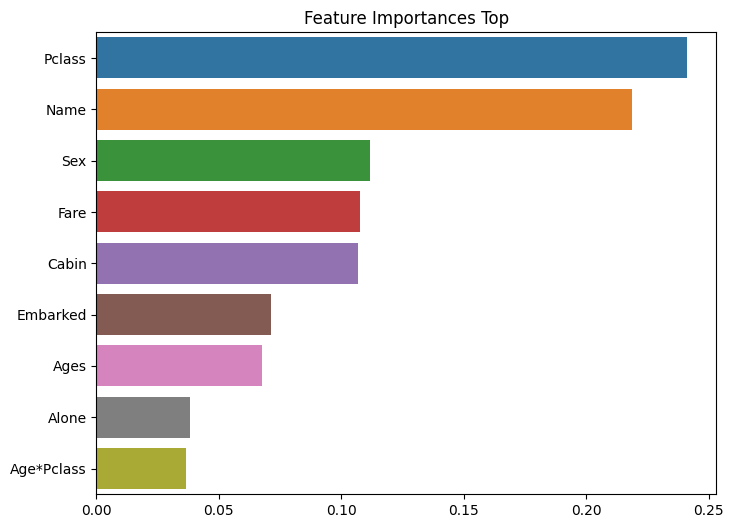

In [82]:
plt.figure(figsize=(8,6))
plt.title('Feature Importances Top')
sns.barplot(x = ser, y = x_train_columns)
plt.show()

In [83]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest'],
    'Score': [acc_log, 
              acc_random_forest,]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,89.00
0,Logistic Regression,81.48


그리드 서치

In [84]:
# from sklearn.model_selection import GridSearchCV

# parameters = {'max_depth':[2,3,5,10],'n_estimators' : [1,5,10,30,100] ,
#              'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

# grid_dclf = GridSearchCV(rf , param_grid=parameters , scoring='accuracy' , cv=10)
# grid_dclf.fit(x_train , y_train)

# print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
# print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
# best_dclf = grid_dclf.best_estimator_

# # GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
# dpredictions = best_dclf.predict(x_test)


테스트 제출

In [85]:
gender_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [86]:
submission = pd.concat([df_test['PassengerId'],pd.Series(y_pred)], axis=1)
submission.columns = ['PassengerId','Survived']
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [87]:
gender_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [88]:
submission.to_csv('submission.csv',index = False)